# **Import Libraries**

In [92]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os

In [93]:
np.random.seed(42)

In [94]:
import tensorflow as tf

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# **Data Preprocessing**

## Import Dataset

In [95]:
# import the DataSet
dt = pd.read_csv('Interpolated_Training_Data.csv')

In [96]:
dt = dt.dropna()
dt

,Configuration,Pressure,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS10DS10_0_1,0.0,-14.266649,-8.307888,-5.844170,-4.538399,-3.596456,-3.205699
1,DS10DS10_0_1,8.5,-14.408452,-8.399550,-5.738773,-4.142236,-2.953373,-2.136300
2,DS10DS10_0_1,17.0,-13.957240,-7.325239,-4.092228,-2.035293,-0.421883,0.750848
3,DS10DS10_0_1,25.5,-13.576226,-6.441465,-2.790626,-0.286894,1.695869,3.151817
4,DS10DS10_0_1,34.0,-13.579100,-6.399944,-2.623292,0.035310,2.201195,3.861465
...,...,...,...,...,...,...,...,...
4177,E30E30_3_6,306.0,-15.068790,-9.740283,-6.932789,-5.844170,-5.786874,-6.119189
4178,E30E30_3_6,314.5,-15.068790,-9.740283,-6.932789,-5.892871,-5.844170,-6.179350
4179,E30E30_3_6,323.0,-15.126086,-9.740283,-6.932789,-5.901465,-5.844170,-6.296806
4180,E30E30_3_6,331.5,-15.068790,-9.740283,-6.932789,-5.844170,-5.789739,-6.356967


## Dividing Data and Target S|et

In [97]:
# Dividing Data and Target set
data = dt[dt.columns[1:]].to_numpy()
target = dt['Configuration'].to_numpy()
dt['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_0_2', 'DS10DS10_0_3', 'DS10DS10_0_6',
       'DS10DS10_1_2', 'DS10DS10_1_3', 'DS10DS10_1_6', 'DS10DS10_2_3',
       'DS10DS10_2_6', 'DS10DS10_3_6', 'DS10DS30_1_1', 'DS10DS30_1_2',
       'DS10DS30_1_3', 'DS10DS30_1_6', 'DS10DS30_2_1', 'DS10DS30_2_2',
       'DS10DS30_2_3', 'DS10DS30_2_6', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS10DS30_3_3', 'DS10DS30_3_6', 'DS10DS30_6_1', 'DS10DS30_6_2',
       'DS10DS30_6_3', 'DS10DS30_6_6', 'DS10E30_1_1', 'DS10E30_1_2',
       'DS10E30_1_3', 'DS10E30_2_1', 'DS10E30_2_2', 'DS10E30_2_3',
       'DS10E30_2_6', 'DS10E30_3_1', 'DS10E30_3_2', 'DS10E30_3_3',
       'DS10E30_3_6', 'DS10E30_6_1', 'DS10E30_6_3', 'DS10E30_6_6',
       'DS20DS20_0_1', 'DS20DS20_0_2', 'DS20DS20_0_3', 'DS20DS20_0_6',
       'DS20DS20_1_2', 'DS20DS20_1_3', 'DS20DS20_1_6', 'DS20DS20_2_3',
       'DS20DS20_2_6', 'DS20DS20_3_6', 'DS20E30_1_1', 'DS20E30_1_2',
       'DS20E30_1_3', 'DS20E30_1_6', 'DS20E30_2_1', 'DS20E30_2_2',
       'DS20E30_2_6', 'DS2

In [98]:
np.shape(dt['Configuration'].unique())

(102,)

In [99]:
print(np.shape(data))
print(np.shape(target))

(4182, 7)
(4182,)


## Decoding

In [100]:
from sklearn import preprocessing
from keras.utils import to_categorical

le = preprocessing.LabelEncoder()

categories = dt['Configuration'].unique()

# Fit the encoder to the categories and transform (encode) them
encoded_labels = le.fit_transform(categories)

# Now to decode, use inverse_transform
decoded_labels = le.inverse_transform(encoded_labels)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels)
print("Decoded Labels:", decoded_labels)


Encoded Labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS10DS30_3_3' 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2'
 'DS10DS30_6_3' 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3'
 'DS10E30_2_1' 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_2_6' 'DS10E30_3_1'
 'DS10E30_3_2' 'DS10E30_3_3' 'DS10E30_3_6' 

## Label Encoding

In [101]:
# Label encoding

le.fit(target)
target_encoded = to_categorical(le.transform(target), 102) # Number has to be changed
np.shape(target_encoded)

(4182, 102)

In [102]:
target_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [103]:
categories = dt['Configuration'].unique()

# Fit the encoder to the categories and transform (encode) them
encoded_labels = le.fit_transform(categories)

# Now to decode, use inverse_transform
decoded_labels = le.inverse_transform(encoded_labels)

# Print encoded and decoded results for comparison
print("Encoded Labels:", encoded_labels)
print("Decoded Labels:", decoded_labels)


Encoded Labels: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
Decoded Labels: ['DS10DS10_0_1' 'DS10DS10_0_2' 'DS10DS10_0_3' 'DS10DS10_0_6'
 'DS10DS10_1_2' 'DS10DS10_1_3' 'DS10DS10_1_6' 'DS10DS10_2_3'
 'DS10DS10_2_6' 'DS10DS10_3_6' 'DS10DS30_1_1' 'DS10DS30_1_2'
 'DS10DS30_1_3' 'DS10DS30_1_6' 'DS10DS30_2_1' 'DS10DS30_2_2'
 'DS10DS30_2_3' 'DS10DS30_2_6' 'DS10DS30_3_1' 'DS10DS30_3_2'
 'DS10DS30_3_3' 'DS10DS30_3_6' 'DS10DS30_6_1' 'DS10DS30_6_2'
 'DS10DS30_6_3' 'DS10DS30_6_6' 'DS10E30_1_1' 'DS10E30_1_2' 'DS10E30_1_3'
 'DS10E30_2_1' 'DS10E30_2_2' 'DS10E30_2_3' 'DS10E30_2_6' 'DS10E30_3_1'
 'DS10E30_3_2' 'DS10E30_3_3' 'DS10E30_3_6' 

## Split Train & Validation Set

In [104]:
# Shuffle the data and target
permutation = tf.random.shuffle(tf.range(tf.shape(data)[0]))
data_shuffled = tf.gather(data, permutation)
target_shuffled = tf.gather(target_encoded, permutation)

print(data_shuffled)
print(target_shuffled)

# Split train and Validation Set
train_data = data_shuffled
train_target = target_shuffled



tf.Tensor(
[[ 68.         -16.46680703 -10.70285161 ...  -8.88084582  -9.86633323
  -11.43623759]
 [170.         -13.09208562  -5.38981398 ...   2.88656137   5.27092524
    8.3938317 ]
 [212.5        -15.06879001  -9.7975783  ...  -7.54155396  -8.34369487
   -9.45380362]
 ...
 [340.         -19.42326925 -19.13679036 ... -29.85110113 -36.26822843
  -44.175046  ]
 [ 17.         -15.45840131  -9.60277265 ...  -4.9619291   -4.18700368
   -3.45043779]
 [204.         -17.31478457 -16.55848028 ... -19.07949458 -23.2047907
  -27.22695442]], shape=(4182, 7), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(4182, 102), dtype=float64)


In [105]:
# Calculate the number of samples for validation set (20% of the data)\
num_val_samples = int(0.2 * int(tf.shape(data)[0]))

# Get the validation data and target
val_data = data_shuffled[:num_val_samples]
val_target = target_shuffled[:num_val_samples]

## Standarlization

In [106]:
# Standarlization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
train_scaled = ss.transform(train_data)
val_scaled = ss.transform(val_data)
print("Train Scaled: ", train_scaled)
print()
print("Validation Scaled: ", val_scaled)
print()
print("Train Target: ", train_target)

Train Scaled:  [[-1.01418511 -0.05064041 -0.02481522 ... -0.15548426 -0.17020823
  -0.20434445]
 [ 0.          1.20707326  0.90822015 ...  0.82316451  0.79678615
   0.81334618]
 [ 0.42257713  0.47038189  0.13416201 ... -0.04410065 -0.07293945
  -0.10260479]
 ...
 [ 1.69030851 -1.15247446 -1.50591957 ... -1.89949756 -1.85680718
  -1.88451904]
 [-1.52127766  0.32517896  0.1683723  ...  0.17043656  0.19259721
   0.20549142]
 [ 0.3380617  -0.36667033 -1.05313631 ... -1.00366559 -1.02229208
  -1.01473317]]

Validation Scaled:  [[-1.01418511 -0.05064041 -0.02481522 ... -0.15548426 -0.17020823
  -0.20434445]
 [ 0.          1.20707326  0.90822015 ...  0.82316451  0.79678615
   0.81334618]
 [ 0.42257713  0.47038189  0.13416201 ... -0.04410065 -0.07293945
  -0.10260479]
 ...
 [-0.6761234  -0.21292605 -0.24818829 ... -0.28414098 -0.29026128
  -0.32019828]
 [ 0.59160798  1.01862975  1.41202956 ...  1.30750941  1.21543456
   1.23552166]
 [ 0.25354628 -1.81442903 -2.0781873  ... -1.77846495 -1.77271

In [107]:
print(train_scaled.shape, train_target.shape)

(4182, 7) (4182, 102)


# Create FNN Model

In [108]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('/content/my_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [109]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=7, activation=keras.layers.LeakyReLU(alpha=0.01))) # Number need to be changed depend on training data columns
model.add(Dropout(0.2))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(102, activation='softmax')) # Number has 3to be changed depends on .unique()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
# compile model
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
# Model Fit
history = model.fit(train_scaled, train_target, epochs=100,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0206 - loss: 4.3960 - val_accuracy: 0.0945 - val_loss: 3.7155
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0982 - loss: 3.5046 - val_accuracy: 0.2333 - val_loss: 2.7378
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2060 - loss: 2.6720 - val_accuracy: 0.3433 - val_loss: 2.2143
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2979 - loss: 2.2591 - val_accuracy: 0.4151 - val_loss: 1.9223
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3781 - loss: 2.0013 - val_accuracy: 0.4988 - val_loss: 1.6803
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4231 - loss: 1.8087 - val_accuracy: 0.5610 - val_loss: 1.4963
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4770 - loss: 1.6425 - val_accuracy: 0.5957 - val_loss: 1.3646
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5040 - loss: 1.5158 - val_accu

## Model Evaluation and Summary

In [112]:
# Evaluating the model
model.evaluate(val_scaled, val_target)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1778 


[0.18793782591819763, 0.9449760913848877]

In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict the trainig & validation data
y_pred_train = model.predict(train_scaled)
y_pred_val = model.predict(val_scaled)

# Calculate the R-squared value
r2_train = r2_score(train_target, y_pred_train)
r2_val = r2_score(val_target, y_pred_val)

# Calculate the mean squared error
mse_train = mean_squared_error(train_target, y_pred_train)
mse_val = mean_squared_error(val_target, y_pred_val)

# Calculate the root mean squared error
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

# Calculate the mean absolute error
mae_train = mean_absolute_error(train_target, y_pred_train)
mae_val = mean_absolute_error(val_target, y_pred_val)

# Print the results
print("R-squared for Train Model:", r2_train)
print("R-squared for Validation Model:", r2_val)
print()

print("MSE for Train Model:", mse_train)
print("MSE for Validation Model:", mse_val)
print()

print("RMSE for Train Model:", rmse_train)
print("RMSE for Validation Model:", rmse_val)
print()

print("MAE for Train Model:", mae_train)
print("MAE for Validation Model:", mae_val)

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared for Train Model: 0.8984482587951642
R-squared for Validation Model: 0.9085456989314621

MSE for Train Model: 0.0009858444695971195
MSE for Validation Model: 0.0008589422589779036

RMSE for Train Model: 0.031398160290009344
RMSE for Validation Model: 0.029307716713826475

MAE for Train Model: 0.002518938278627103
MAE for Validation Model: 0.00232070066716655


In [114]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


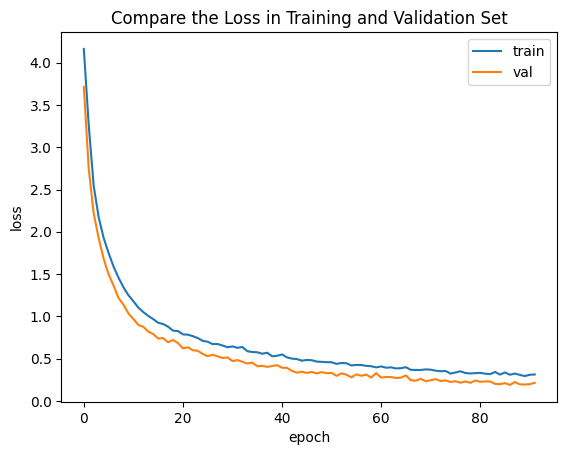

In [115]:
# Plot Loss of both training and validation set
import matplotlib.pyplot as plt

plt.title('Compare the Loss in Training and Validation Set')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

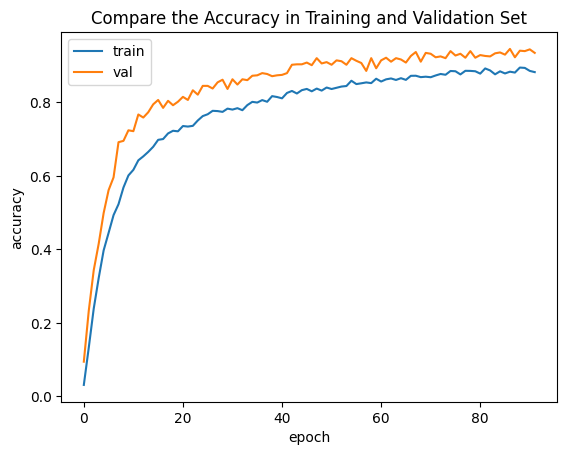

In [116]:
# Plot Loss of both training and validation set

plt.title('Compare the Accuracy in Training and Validation Set')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [117]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 102)                 │          10,302 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,096 (769.91 KB)

 Trainable params: 65,698 (256.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131,398 (513.28 KB)

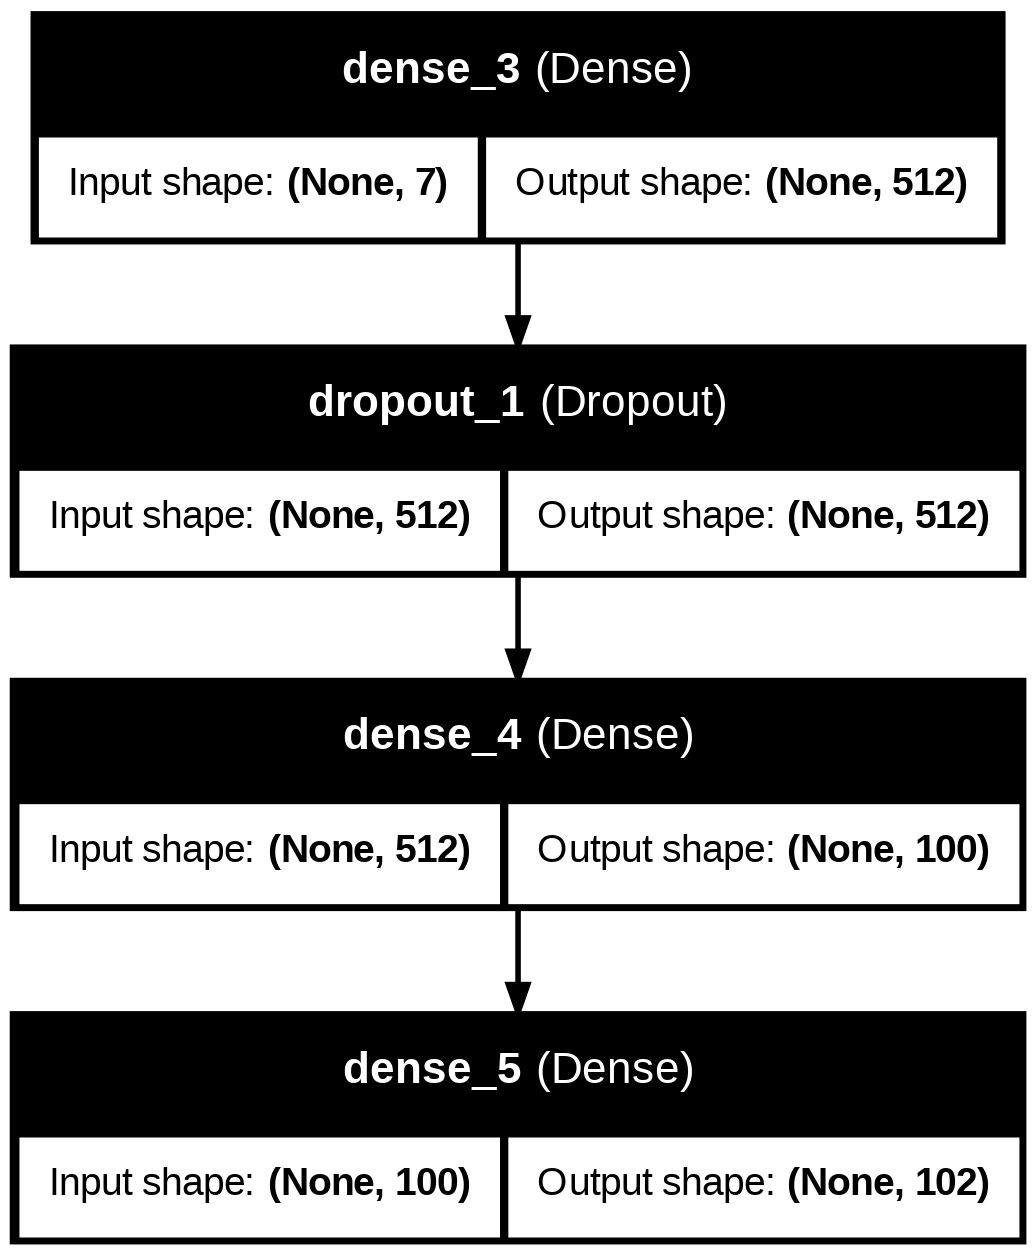

In [118]:
from tensorflow.keras.utils import plot_model

# Generate and save the model diagram
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

## Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
predictions = model.predict(val_scaled)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert target labels back to original labels
predicted_labels = le.inverse_transform(predicted_labels)

# Get true labels
true_labels = np.argmax(val_target, axis=1)
true_labels = le.inverse_transform(true_labels)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to show values between 0 and 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print normalized confusion matrix
print(cm_normalized)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decoded_labels)
fig, ax = plt.subplots(figsize=(102,102))
disp.plot(ax=ax, cmap='viridis', values_format='.2f', colorbar=False) # Disable the automatic color bar
ax.set_title('Confusion Matrix for Experiment', fontsize = 250, fontweight = 'bold')  # Set the title font
ax.set_xlabel('Predicted Configurations', fontsize = 150, fontweight = 'bold')  # Set the x-axis label
ax.set_ylabel('True Configurations', fontsize = 150, fontweight = 'bold')       # Set the y-axis label

# Remove the text from the matrix cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.texts[i * cm.shape[1] + j].set_visible(False)

# Hide tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a single color bar
cbar = fig.colorbar(disp.im_, ax=ax)
cbar.ax.set_ylabel('Normalized Value', rotation=-90, va="bottom", fontsize=150, fontweight = 'bold')  # Increase font size of the color bar label
cbar.ax.tick_params(labelsize=40)  # Increase font size of the color bar ticks

plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.9        0.1        0.         ... 0.         0.         0.        ]
 [0.         0.85714286 0.         ... 0.         0.         0.        ]
 [0.         0.         0.9        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.92857143 0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [120]:
print(predictions)
print(predicted_labels)

[[6.8051441e-25 2.4999979e-18 7.5428672e-19 ... 1.7297902e-14
  1.9352332e-19 4.6992664e-15]
 [7.7554152e-10 1.5621684e-02 3.2097230e-06 ... 5.9037160e-20
  1.5283895e-19 1.6425869e-30]
 [1.8482575e-31 3.6152510e-15 1.5583105e-20 ... 8.1049922e-09
  5.4172494e-07 1.6959664e-08]
 ...
 [1.2060714e-21 4.5295216e-17 2.2710156e-20 ... 1.2074211e-12
  1.9248851e-15 2.7790051e-13]
 [1.0437462e-22 1.4821562e-14 5.3315039e-04 ... 6.2747367e-17
  0.0000000e+00 1.0709459e-23]
 [2.5256618e-31 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
['DS10E30_1_1' 'E30E30_0_2' 'DS10DS10_1_2' 'DS30E30_2_3' 'DS10DS30_6_3'
 'DS30E30_2_2' 'DS10DS30_3_3' 'DS10E30_1_3' 'DS30DS30_0_1' 'DS10E30_1_3'
 'DS10DS10_0_6' 'DS10DS10_1_3' 'DS30E30_3_1' 'DS10E30_6_6' 'DS10DS30_3_1'
 'E30E30_0_6' 'DS10DS30_3_6' 'DS30E30_3_2' 'DS10DS30_3_3' 'DS20E30_3_1'
 'DS10DS30_6_1' 'DS10DS10_2_3' 'DS10DS30_3_6' 'DS20E30_6_6' 'DS30DS30_0_3'
 'DS10E30_2_3' 'DS20E30_6_3' 'E30E30_0_2' 'DS10DS30_6_6' 'DS20DS20_3_6

# **Validating FNN Model**

## Taking Training Data to Validate

In [121]:
# import the DataSet
dt_1 = pd.read_csv('Interpolated_Training_Data.csv')

dt_1 = dt_1.dropna()

# Dividing Data and Target set
data2val = dt_1[dt_1.columns[1:]].to_numpy()
target2val = dt_1['Configuration'].to_numpy()
dt_1['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_0_2', 'DS10DS10_0_3', 'DS10DS10_0_6',
       'DS10DS10_1_2', 'DS10DS10_1_3', 'DS10DS10_1_6', 'DS10DS10_2_3',
       'DS10DS10_2_6', 'DS10DS10_3_6', 'DS10DS30_1_1', 'DS10DS30_1_2',
       'DS10DS30_1_3', 'DS10DS30_1_6', 'DS10DS30_2_1', 'DS10DS30_2_2',
       'DS10DS30_2_3', 'DS10DS30_2_6', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS10DS30_3_3', 'DS10DS30_3_6', 'DS10DS30_6_1', 'DS10DS30_6_2',
       'DS10DS30_6_3', 'DS10DS30_6_6', 'DS10E30_1_1', 'DS10E30_1_2',
       'DS10E30_1_3', 'DS10E30_2_1', 'DS10E30_2_2', 'DS10E30_2_3',
       'DS10E30_2_6', 'DS10E30_3_1', 'DS10E30_3_2', 'DS10E30_3_3',
       'DS10E30_3_6', 'DS10E30_6_1', 'DS10E30_6_3', 'DS10E30_6_6',
       'DS20DS20_0_1', 'DS20DS20_0_2', 'DS20DS20_0_3', 'DS20DS20_0_6',
       'DS20DS20_1_2', 'DS20DS20_1_3', 'DS20DS20_1_6', 'DS20DS20_2_3',
       'DS20DS20_2_6', 'DS20DS20_3_6', 'DS20E30_1_1', 'DS20E30_1_2',
       'DS20E30_1_3', 'DS20E30_1_6', 'DS20E30_2_1', 'DS20E30_2_2',
       'DS20E30_2_6', 'DS2

In [122]:
# Standarlization
data2val_scaled = ss.transform(data2val)

# Prediction
pred2val = model.predict(data2val_scaled)
pred2val

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.2717000e-01, 2.5035551e-01, 2.0791688e-09, ..., 4.5360396e-21,
        5.7856785e-11, 6.2438616e-31],
       [1.0439865e-01, 2.2972105e-01, 3.3051037e-08, ..., 4.9931600e-18,
        3.9399706e-09, 3.8976446e-27],
       [2.7509409e-01, 2.9813731e-01, 2.1089748e-07, ..., 6.2703193e-22,
        3.6576831e-14, 2.1435464e-32],
       ...,
       [3.1051939e-28, 1.1175473e-16, 1.2537085e-19, ..., 8.8020846e-05,
        3.8467431e-07, 9.9956471e-01],
       [1.0531941e-27, 5.8387786e-16, 1.8433511e-19, ..., 2.1532344e-04,
        3.2311057e-06, 9.9950004e-01],
       [7.4267234e-28, 2.5307568e-16, 3.1689398e-19, ..., 9.1034068e-05,
        2.3207696e-07, 9.9927038e-01]], dtype=float32)

In [123]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val)):
    maxarg2val = np.argmax(pred2val[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val)

[1, 68, 1, 66, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 68, 1, 68, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 11, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 68, 68, 68, 68, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 73, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 47, 6, 31, 31, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 81, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 88, 88, 88, 88, 88, 88, 88, 88, 88, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [124]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent = 100 - accuracy_percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent))
print("Incorrect: {}%".format(incorrect_percent))

Accuracy: 93.68723098995696%
Incorrect: 6.312769010043041%


In [125]:
index_list = []
for i in range(len(target2val)):
    if target2val[i] != decoded_pred2val[i]:
        index_list.append(i)

print("Indexes where target and prediction differ:")
for index in index_list:
    print(index, decoded_pred2val[index])

print("Corresponding data points:")
for index in index_list:
    print(data2val[index])


Indexes where target and prediction differ:
0 DS10DS10_0_2
1 DS30DS30_0_6
2 DS10DS10_0_2
3 DS30DS30_0_2
4 DS10DS10_0_2
43 DS30DS30_0_6
45 DS30DS30_0_6
82 DS10DS30_1_2
83 DS10DS30_1_2
84 DS10DS30_6_1
123 DS30DS30_0_6
124 DS30DS30_0_6
125 DS30DS30_0_6
126 DS30DS30_0_6
205 DS30DS30_2_6
247 DS20DS20_2_3
249 DS10E30_2_3
250 DS10E30_2_3
287 DS30E30_2_2
299 DS30E30_6_1
300 DS30E30_6_1
301 DS30E30_6_1
302 DS30E30_6_1
303 DS30E30_6_1
304 DS30E30_6_1
305 DS30E30_6_1
306 DS30E30_6_1
307 DS30E30_6_1
328 DS30E30_2_1
412 DS30DS30_1_2
413 DS30DS30_1_2
414 DS10DS30_1_2
451 DS10DS30_3_2
452 DS10DS30_2_6
492 DS10E30_1_3
493 E30E30_1_6
494 E30E30_1_6
533 DS10E30_1_1
534 DS10E30_1_1
535 DS10E30_1_1
536 DS10E30_1_1
537 DS10E30_1_1
545 DS30DS30_1_3
546 DS30DS30_1_3
574 DS10DS30_2_2
575 DS10DS30_2_2
576 DS10DS30_2_2
577 E30E30_0_6
618 E30E30_0_6
633 DS10DS10_0_3
634 DS10DS10_0_3
697 DS10DS30_1_2
698 DS10DS30_1_2
708 DS10DS10_1_2
743 DS10DS30_3_2
780 DS10DS30_2_6
781 DS10DS30_2_6
782 DS10DS30_1_2
783 DS10DS30

## Validating with Altifically Made Error

### With 1% error dataset

In [126]:
# Increase the whole data by 2%
data2val_1percent = data2val * 1.01

# Standarlization
data2val_1percent_scaled = ss.transform(data2val_1percent)

# Prediction
pred2val_1percent = model.predict(data2val_1percent_scaled)
pred2val_1percent

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.2027081e-01, 3.0805832e-01, 2.1466601e-08, ..., 3.3805670e-19,
        1.0607434e-09, 2.0830945e-28],
       [8.1591122e-02, 2.1985777e-01, 3.9258589e-07, ..., 4.6995490e-16,
        9.1300237e-08, 1.7663385e-24],
       [2.8579989e-01, 3.1930003e-01, 1.5337804e-06, ..., 2.9553580e-20,
        1.9833156e-13, 3.3118352e-30],
       ...,
       [1.2379691e-28, 8.3451497e-18, 1.1055601e-19, ..., 1.4087155e-05,
        3.0151663e-09, 9.9907815e-01],
       [3.4489096e-28, 3.4939927e-17, 1.3546690e-19, ..., 3.0123962e-05,
        2.3074394e-08, 9.9934882e-01],
       [2.8906752e-28, 1.8487338e-17, 2.6491459e-19, ..., 1.4557080e-05,
        1.9625248e-09, 9.9838769e-01]], dtype=float32)

In [127]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_1percent)):
    maxarg2val = np.argmax(pred2val_1percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_1percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_1percent)

[1, 68, 1, 66, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 68, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22, 11, 22, 22, 23, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 15, 20, 20, 68, 3, 15, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 17, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 73, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 101, 5, 6, 31, 31, 6, 26, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 83, 81, 81, 39, 7, 39, 7, 7, 7, 39, 39, 7, 7, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [128]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_1percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_1percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_1percent = 100 - accuracy_percent_1percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_1percent))
print("Incorrect: {}%".format(incorrect_percent_1percent))

Accuracy: 86.39406982305117%
Incorrect: 13.605930176948831%


### With 2% error dataset

In [129]:
# Increase the whole data by 2%
data2val_2percent = data2val * 1.02

# Standarlization
data2val_2percent_scaled = ss.transform(data2val_2percent)

# Prediction
pred2val_2percent = model.predict(data2val_2percent_scaled)
pred2val_2percent

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[9.6493289e-02, 3.3722094e-01, 2.0301647e-07, ..., 2.3723729e-17,
        1.5202380e-08, 5.8227148e-26],
       [5.3080406e-02, 1.7835376e-01, 4.1033804e-06, ..., 3.9355902e-14,
        1.5521844e-06, 6.2537671e-22],
       [2.2287993e-01, 2.8860518e-01, 1.9629313e-05, ..., 2.5701385e-18,
        1.8155813e-12, 9.7458767e-28],
       ...,
       [6.4954280e-29, 8.4049176e-19, 1.1880667e-19, ..., 2.7272386e-06,
        2.9901002e-11, 9.9728811e-01],
       [1.6713275e-28, 3.2598578e-18, 1.3454014e-19, ..., 5.4715588e-06,
        2.2881876e-10, 9.9827600e-01],
       [1.5100712e-28, 1.8397082e-18, 2.9231255e-19, ..., 2.7353581e-06,
        1.9588218e-11, 9.9525130e-01]], dtype=float32)

In [130]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_2percent)):
    maxarg2val = np.argmax(pred2val_2percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_2percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_2percent)

[1, 68, 1, 66, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 68, 1, 66, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 22, 12, 22, 22, 22, 22, 24, 22, 2, 24, 2, 2, 2, 2, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 95, 15, 15, 3, 3, 3, 3, 3, 3, 93, 93, 93, 93, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 70, 4, 4, 4, 4, 4, 4, 4, 17, 17, 17, 4, 4, 4, 4, 4, 98, 98, 98, 98, 98, 98, 98, 98, 98, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 54, 54, 5, 34, 34, 34, 30, 30, 30, 5, 5, 5, 89, 89, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 54, 5, 31, 31, 31, 26, 26, 26, 26, 26, 6, 26, 26, 26, 6, 6, 6, 26, 26, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 83, 83, 39, 39, 39, 39, 39, 39, 7, 39, 39, 39, 39, 

In [131]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_2percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_2percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_2percent = 100 - accuracy_percent_2percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_2percent))
print("Incorrect: {}%".format(incorrect_percent_2percent))

Accuracy: 64.77761836441894%
Incorrect: 35.22238163558106%


In [132]:
# Compare target2val and decoded_pred2val, everytime both are not the same, collect its index. then show the corresponding index of data2val

index_list = []
for i in range(len(target2val)):
    if target2val[i] != decoded_pred2val_2percent[i]:
        index_list.append(i)

print("Indexes where target and prediction differ:")
for index in index_list:
    print(index, decoded_pred2val_2percent[index])

print("Corresponding data points:")
for index in index_list:
    print(data2val[index])


Indexes where target and prediction differ:
0 DS10DS10_0_2
1 DS30DS30_0_6
2 DS10DS10_0_2
3 DS30DS30_0_2
4 DS10DS10_0_2
43 DS30DS30_0_6
45 DS30DS30_0_2
82 DS10DS30_6_1
83 DS10DS30_1_3
84 DS10DS30_6_1
85 DS10DS30_6_1
86 DS10DS30_6_1
87 DS10DS30_6_1
88 DS10DS30_6_3
89 DS10DS30_6_1
91 DS10DS30_6_3
96 DS10DS30_2_2
97 DS10DS30_2_2
98 DS10DS30_2_2
99 DS10DS30_2_2
100 DS10DS30_2_2
101 DS10DS30_2_2
102 DS10DS30_2_2
103 DS10DS30_2_2
104 DS10DS30_2_2
105 DS10DS30_2_2
106 DS10DS30_2_2
107 DS10DS30_2_2
108 DS10DS30_2_2
109 DS10DS30_2_2
110 DS10DS30_2_2
111 DS10DS30_2_2
112 DS10DS30_2_2
113 DS10DS30_2_2
114 DS10DS30_2_2
115 DS10DS30_2_2
116 DS10DS30_2_2
117 DS10DS30_2_2
118 DS10DS30_2_2
119 DS10DS30_2_2
120 DS10DS30_2_2
121 DS10DS30_2_2
122 DS10DS30_2_2
123 DS10DS30_3_3
124 DS10DS30_3_3
125 DS10DS30_3_3
126 E30E30_0_6
127 DS10DS30_2_2
128 DS10DS30_2_2
135 E30E30_0_2
136 E30E30_0_2
137 E30E30_0_2
138 E30E30_0_2
164 DS30DS30_1_3
172 DS10DS30_2_6
173 DS10DS30_2_6
174 DS10DS30_2_6
180 E30E30_1_6
181 E30

### With 5% error dataset

In [133]:
# Increase the whole data by 2%
data2val_5percent = data2val * 1.05

# Standarlization
data2val_5percent_scaled = ss.transform(data2val_5percent)

# Prediction
pred2val_5percent = model.predict(data2val_5percent_scaled)
pred2val_5percent

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.74124667e-03, 5.99694438e-02, 5.73205398e-05, ...,
        2.47540963e-12, 1.31971465e-05, 3.04817116e-19],
       [6.11191790e-04, 4.03935555e-03, 2.08875834e-04, ...,
        1.06107745e-09, 3.48509406e-04, 1.27712949e-15],
       [1.96415409e-02, 4.12787683e-02, 1.08785490e-02, ...,
        3.62469657e-13, 9.09546188e-11, 6.19000659e-21],
       ...,
       [5.97052765e-30, 9.42504958e-22, 7.48850434e-19, ...,
        6.67958560e-08, 1.57786009e-17, 7.36651361e-01],
       [3.08641588e-29, 5.84295262e-21, 7.39848693e-19, ...,
        1.21179227e-07, 2.08622124e-16, 8.53383005e-01],
       [2.33272261e-29, 2.65439653e-21, 1.33683606e-18, ...,
        5.87657496e-08, 1.15153765e-17, 6.29976273e-01]], dtype=float32)

In [134]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2val_5percent)):
    maxarg2val = np.argmax(pred2val_5percent[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2val_5percent = le.inverse_transform(maxarg2val_list)
print(decoded_pred2val_5percent)

[15, 20, 14, 66, 14, 14, 14, 2, 2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 20, 20, 14, 66, 14, 14, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 30, 101, 24, 24, 24, 18, 18, 18, 19, 19, 19, 19, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 19, 24, 24, 24, 10, 10, 10, 15, 15, 15, 10, 10, 10, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 15, 15, 15, 15, 15, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 27, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 98, 98, 98, 98, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 82, 46, 36, 8, 8, 29, 29, 33, 91, 91, 91, 91, 91, 91, 91, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 69, 69, 69, 69, 69, 69, 69, 69, 56, 56, 55, 55, 55, 30, 30, 30, 30, 32, 26, 32, 32, 26, 26, 26, 2

In [135]:
# Calculate the number of correct predictions
correct_predictions = sum(target2val == decoded_pred2val_5percent)

# Calculate the total number of predictions
total_predictions = len(target2val)

# Calculate the percentage of correct predictions
accuracy_percent_5percent = (correct_predictions / total_predictions) * 100

# Calculate the percentage of incorrect predictions
incorrect_percent_5percent = 100 - accuracy_percent_5percent

# Print the results
print("Accuracy: {}%".format(accuracy_percent_5percent))
print("Incorrect: {}%".format(incorrect_percent_5percent))

Accuracy: 18.555714968914394%
Incorrect: 81.4442850310856%


### Accuracy for with 0%, 1%, 2%, 5% error

In [136]:
print("0% Accuracy: {}%".format(accuracy_percent))
print("1% Accuracy: {}%".format(accuracy_percent_1percent))
print("2% Accuracy: {}%".format(accuracy_percent_2percent))
print("5% Accuracy: {}%".format(accuracy_percent_5percent))

0% Accuracy: 93.68723098995696%
1% Accuracy: 86.39406982305117%
2% Accuracy: 64.77761836441894%
5% Accuracy: 18.555714968914394%


## With Random Data (Close to the Configuration on the LEFT)

In [137]:
# import the DataSet
rndConfi = pd.read_csv('5_Randomly_Selected_Configurations.csv')

rndConfi = rndConfi.dropna()

# Dividing Data and Target set
data_rnd = rndConfi[rndConfi.columns[1:]].to_numpy()
target_rnd = rndConfi['Configuration'].to_numpy()
rndConfi['Configuration'].unique()

array(['DS30DS30_0_1vsDS20DS20_0_1', 'DS20DS20_0_1vsDS30DS30_0_2',
       'DS30DS30_0_2vsDS10DS30_6_1', 'DS10DS30_6_1vsDS30DS30_0_3'],
      dtype=object)

In [138]:
np.shape(data_rnd)

(164, 7)

In [139]:
# Standarlization
data_rnd_scaled = ss.transform(data_rnd)

# Prediction
pred2rnd = model.predict(data_rnd_scaled)
pred2rnd

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.63576988e-05, 1.10937930e-04, 1.57623565e-14, ...,
        7.50280796e-33, 3.01773291e-20, 0.00000000e+00],
       [3.17530576e-05, 4.18129464e-04, 8.80163997e-14, ...,
        1.52236722e-30, 2.70178178e-18, 0.00000000e+00],
       [4.34961723e-04, 2.59689009e-03, 7.49507444e-13, ...,
        5.40674777e-30, 2.58888320e-18, 0.00000000e+00],
       ...,
       [4.81599962e-14, 9.91192172e-28, 2.66781802e-21, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13415957e-13, 3.45507826e-27, 7.55850583e-21, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20437609e-13, 5.76424477e-27, 1.68065458e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [140]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(pred2rnd)):
    maxarg2val = np.argmax(pred2rnd[i])
    maxarg2val_list.append(maxarg2val)

print(maxarg2val_list)
decoded_pred2rnd = le.inverse_transform(maxarg2val_list)
print(decoded_pred2rnd)

[65, 65, 42, 40, 40, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 40, 42, 65, 40, 40, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 40, 66, 15, 14, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 19, 11, 22, 67, 2, 22, 22, 67, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
['DS30DS30_0_1' 'DS30DS30_0_1' 'DS20DS20_0_3' 'DS20DS20_0_1'
 'DS20DS20_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS3

In [141]:
np.shape(decoded_pred2rnd)

(164,)

### Save results in an excel

In [142]:
# Create a Pandas DataFrame
df = pd.DataFrame(decoded_pred2rnd)

# Export the DataFrame to an Excel file
df.to_excel('decoded_pred2rnd.xlsx', sheet_name='Sheet1')


### Show Accuracy

In [143]:
# To count how many correct predictions

count_DS30DS30_0_1 = 0
count_DS20DS20_0_1 =0
count_DS30DS30_0_2 = 0
count_DS10DS30_6_1 = 0

In [144]:
for i in range(164):
  if i < 40:
    if decoded_pred2rnd[i]  == "DS30DS30_0_1":
      count_DS30DS30_0_1 = count_DS30DS30_0_1 + 1
  if i in range(41,81):
    if decoded_pred2rnd[i]  == "DS20DS20_0_1":
      count_DS20DS20_0_1 = count_DS20DS20_0_1 + 1
  if i in range(82,122):
    if decoded_pred2rnd[i]  == "DS30DS30_0_2":
      count_DS30DS30_0_2 = count_DS30DS30_0_2 + 1
  if i in range(123,164):
    if decoded_pred2rnd[i]  == "DS10DS30_6_1":
      count_DS10DS30_6_1 = count_DS10DS30_6_1 + 1

In [145]:
accuracy_DS30DS30_0_1vsDS20DS20_0_1 = (count_DS30DS30_0_1 / 40) * 100
accuracy_DS20DS20_0_1vsDS30DS30_0_2 = (count_DS20DS20_0_1 / 40) * 100
accuracy_DS30DS30_0_2vsDS10DS30_6_1 = (count_DS30DS30_0_2 / 40) * 100
accuracy_DS10DS30_6_1vsDS30DS30_0_3 = (count_DS10DS30_6_1 / 40) * 100

In [146]:
print("DS30DS30_0_1vsDS20DS20_0_1 Accuracy: {}%".format(accuracy_DS30DS30_0_1vsDS20DS20_0_1))
print("DS20DS20_0_1vsDS30DS30_0_2 Accuracy: {}%".format(accuracy_DS20DS20_0_1vsDS30DS30_0_2))
print("DS30DS30_0_2vsDS10DS30_6_1 Accuracy: {}%".format(accuracy_DS30DS30_0_2vsDS10DS30_6_1))
print("DS10DS30_6_1vsDS30DS30_0_3 Accuracy: {}%".format(accuracy_DS10DS30_6_1vsDS30DS30_0_3))

DS30DS30_0_1vsDS20DS20_0_1 Accuracy: 92.5%
DS20DS20_0_1vsDS30DS30_0_2 Accuracy: 7.5%
DS30DS30_0_2vsDS10DS30_6_1 Accuracy: 95.0%
DS10DS30_6_1vsDS30DS30_0_3 Accuracy: 90.0%


## Using only Theata 6 with Polynomial Regression Results

In [147]:
# import the DataSet
dt_new = pd.read_csv('Predicted_Thetas.csv')

dt_new = dt_new.dropna()
dt_new

,Configuration,Pressure,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS10DS10_0_1,0.0,-16.639711,-10.042019,-6.881286,-5.151466,-3.954403,-3.205699
1,DS10DS10_0_1,8.5,-16.174732,-9.462150,-6.138270,-4.323520,-3.067240,-2.136300
2,DS10DS10_0_1,17.0,-15.208022,-8.176091,-4.502790,-2.376177,-0.768468,0.750848
3,DS10DS10_0_1,25.5,-14.496063,-7.166287,-3.198159,-0.783136,1.127351,3.151817
4,DS10DS10_0_1,34.0,-14.332024,-6.876733,-2.764980,-0.246192,1.720152,3.861465
...,...,...,...,...,...,...,...,...
4177,E30E30_3_6,306.0,-15.206148,-9.514645,-6.545669,-5.506007,-5.934485,-6.119189
4178,E30E30_3_6,314.5,-15.204349,-9.540397,-6.564689,-5.534158,-5.962803,-6.179350
4179,E30E30_3_6,323.0,-15.217424,-9.589622,-6.606429,-5.592422,-6.029000,-6.296806
4180,E30E30_3_6,331.5,-15.230490,-9.628818,-6.617705,-5.608911,-6.040130,-6.356967


In [148]:
# Dividing Data and Target set
data_new = dt_new[dt_new.columns[1:]].to_numpy()
target_new = dt_new['Configuration'].to_numpy()
dt_new['Configuration'].unique()

array(['DS10DS10_0_1', 'DS10DS10_0_2', 'DS10DS10_0_3', 'DS10DS10_0_6',
       'DS10DS10_1_2', 'DS10DS10_1_3', 'DS10DS10_1_6', 'DS10DS10_2_3',
       'DS10DS10_2_6', 'DS10DS10_3_6', 'DS10DS30_1_1', 'DS10DS30_1_2',
       'DS10DS30_1_3', 'DS10DS30_1_6', 'DS10DS30_2_1', 'DS10DS30_2_2',
       'DS10DS30_2_3', 'DS10DS30_2_6', 'DS10DS30_3_1', 'DS10DS30_3_2',
       'DS10DS30_3_3', 'DS10DS30_3_6', 'DS10DS30_6_1', 'DS10DS30_6_2',
       'DS10DS30_6_3', 'DS10DS30_6_6', 'DS10E30_1_1', 'DS10E30_1_2',
       'DS10E30_1_3', 'DS10E30_2_1', 'DS10E30_2_2', 'DS10E30_2_3',
       'DS10E30_2_6', 'DS10E30_3_1', 'DS10E30_3_2', 'DS10E30_3_3',
       'DS10E30_3_6', 'DS10E30_6_1', 'DS10E30_6_3', 'DS10E30_6_6',
       'DS20DS20_0_1', 'DS20DS20_0_2', 'DS20DS20_0_3', 'DS20DS20_0_6',
       'DS20DS20_1_2', 'DS20DS20_1_3', 'DS20DS20_1_6', 'DS20DS20_2_3',
       'DS20DS20_2_6', 'DS20DS20_3_6', 'DS20E30_1_1', 'DS20E30_1_2',
       'DS20E30_1_3', 'DS20E30_1_6', 'DS20E30_2_1', 'DS20E30_2_2',
       'DS20E30_2_6', 'DS2

In [149]:
# Standardization
data_new_scaled = ss.transform(data_new)

# Prediction
data_new_predicted = model.predict(data_new_scaled)

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [150]:
# Decoding Predictions

maxarg2val_list = []
for i in range(len(data_new_predicted)):
    maxarg2val = np.argmax(data_new_predicted[i])
    maxarg2val_list.append(maxarg2val)

## print(maxarg2val_list)
decoded_pred_new = le.inverse_transform(maxarg2val_list)
print(decoded_pred_new[:10])

['DS30DS30_2_6' 'E30E30_2_3' 'DS30DS30_0_3' 'DS10DS30_2_1' 'DS10DS30_2_1'
 'DS10DS10_0_2' 'DS10DS10_0_2' 'DS30DS30_0_2' 'DS10DS10_0_2'
 'DS10DS10_0_2']


In [151]:
# Find Accuracy

count = 0
for i in range(len(target_new)):
    if target_new[i] == decoded_pred_new[i]:
        count = count + 1

print("Accuracy = ", count/len(target_new))

Accuracy =  0.0899091343854615


In [152]:
dt_new['Pressure'][1]

8.5

In [153]:
# Compare

confi = target_new
thet = dt_new[dt_new.columns[1:]]

index_list = []
for i in range(len(target_new)):
    if target_new[i] != decoded_pred_new[i]:
        index_list.append(i)

configuration = pd.DataFrame(decoded_pred_new, columns=['Configuration'])
dataSet = pd.concat([configuration, dt_new['Pressure']], axis=1)
dataSet

,Configuration,Pressure
0,DS30DS30_2_6,0.0
1,E30E30_2_3,8.5
2,DS30DS30_0_3,17.0
3,DS10DS30_2_1,25.5
4,DS10DS30_2_1,34.0
...,...,...
4177,E30E30_3_6,306.0
4178,E30E30_3_6,314.5
4179,E30E30_3_6,323.0
4180,E30E30_3_6,331.5


In [154]:
merged_data = pd.merge(dt_1, dataSet, on=['Configuration', 'Pressure'], how='right')
predicted_file = merged_data[['Configuration', 'Pressure', 'Theta2', 'Theta3', 'Theta4', 'Theta5', 'Theta6']]
predicted_file.to_csv('Predicted_file.csv', encoding='utf-8', index=False)
predicted_file

,Configuration,Pressure,Theta2,Theta3,Theta4,Theta5,Theta6
0,DS30DS30_2_6,0.0,-10.141353,-6.818198,-5.108492,-3.794699,-2.670556
1,E30E30_2_3,8.5,-9.622826,-6.643446,-5.003383,-3.972775,-3.176965
2,DS30DS30_0_3,17.0,-8.365184,-4.309244,-2.265233,-1.177772,1.498800
3,DS10DS30_2_1,25.5,-8.184702,-5.281367,-3.570601,-2.130128,-0.648746
4,DS10DS30_2_1,34.0,-7.580232,-4.385877,-2.394219,-0.631743,0.747595
...,...,...,...,...,...,...,...
4177,E30E30_3_6,306.0,-9.740283,-6.932789,-5.844170,-5.786874,-6.119189
4178,E30E30_3_6,314.5,-9.740283,-6.932789,-5.892871,-5.844170,-6.179350
4179,E30E30_3_6,323.0,-9.740283,-6.932789,-5.901465,-5.844170,-6.296806
4180,E30E30_3_6,331.5,-9.740283,-6.932789,-5.844170,-5.789739,-6.356967


In [155]:
err = (dt_1['Theta6'] - predicted_file['Theta6'])
err.to_csv('Error.csv', encoding='utf-8', index=False)

In [156]:
err

,Theta6
0,-0.535143
1,1.040665
2,-0.747952
3,3.800563
4,3.113869
...,...
4177,0.000000
4178,0.000000
4179,0.000000
4180,0.000000


In [157]:
count_2_5 = 0
count_5 = 0
count_7_5 = 0
count_10 = 0

for i in range(len(err)):
  if err[i] <= 2.5 and err[i] >= -2.5:
    count_2_5 = count_2_5 + 1

for i in range(len(err)):
  if err[i] <= 5 and err[i] >= -5:
    count_5 = count_5 + 1

for i in range(len(err)):
  if err[i] <= 7.5 and err[i] >= -7.5:
    count_7_5 = count_7_5 + 1

for i in range(len(err)):
  if err[i] <= 10 and err[i] >= -10:
    count_10 = count_10 + 1

print("Within 2.5 degree: ", count_2_5/len(err)*100)
print("Within 5 degree: ", count_5/len(err)*100)
print("Within 7.5 degree: ", count_7_5/len(err)*100)
print("Within 10 degree: ", count_10/len(err)*100)

Within 2.5 degree:  66.54710664753706
Within 5 degree:  89.04830224772836
Within 7.5 degree:  97.77618364418939
Within 10 degree:  99.28263988522238


# Finger Trajectories

## Import Finger Trajectories Dataset

In [158]:
# import the DataSet
dt_fingers = pd.read_csv('Predicted_Thetas_Fingers.csv')

dt_fingers = dt_fingers.dropna()
dt_fingers

,Finger Type,Pressure,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6
0,Finger_Large,0.00,-15.255573,-8.293839,-4.753956,-2.614655,-0.840152,0.780000
1,Finger_Large,2.07,-14.164220,-6.908260,-3.113297,-0.654231,1.551244,3.900000
2,Finger_Large,4.15,-13.895578,-6.550082,-2.678014,-0.131077,2.174629,4.710000
3,Finger_Large,6.22,-13.645652,-6.211339,-2.264506,0.369713,2.773318,5.490000
4,Finger_Large,8.29,-13.343581,-5.801705,-1.768926,0.974249,3.504182,6.450000
...,...,...,...,...,...,...,...,...
377,Finger_Small_2,323.41,-10.794012,3.610604,14.956081,25.223667,36.936565,47.764106
378,Finger_Small_2,327.56,-10.871566,3.549202,14.903804,25.192338,36.898078,47.720295
379,Finger_Small_2,331.70,-11.195542,3.074572,14.263919,24.337420,35.610957,47.381473
380,Finger_Small_2,335.85,-15.528565,-8.637496,-5.164318,-3.104657,-1.442821,47.372901


## Dataset Pre-processing

In [159]:
# Create a dictionary to store the data for each finger type
finger_data = {}

# Get the unique finger types
finger_types = dt_fingers['Finger Type'].unique()

# Loop through each finger type
for finger_type in finger_types:
  # Filter the data for the current finger type
  data_finger = dt_fingers[dt_fingers['Finger Type'] == finger_type]

  # Store the data for the current finger type in the dictionary
  finger_data[f'Data_{finger_type}'] = data_finger

# Access the data for a specific finger type and create as a data frame
df_finger_large = finger_data['Data_Finger_Large']
df_finger_small_1 = finger_data['Data_Finger_Small_1']
df_finger_small_2 = finger_data['Data_Finger_Small_2']

dt_finger_large = df_finger_large[df_finger_large.columns[1:]].to_numpy()
dt_finger_small_1 = df_finger_small_1[df_finger_small_1.columns[1:]].to_numpy()
dt_finger_small_2 = df_finger_small_2[df_finger_small_2.columns[1:]].to_numpy()

# Print the data for the 'finger_large' type
print(dt_finger_large)
print(dt_finger_small_1)
print(dt_finger_small_2)


[[ 0.00000000e+00 -1.52555726e+01 -8.29383860e+00 ... -2.61465522e+00
  -8.40151934e-01  7.80000000e-01]
 [ 2.07000000e+00 -1.41642203e+01 -6.90826031e+00 ... -6.54231158e-01
   1.55124443e+00  3.90000000e+00]
 [ 4.15000000e+00 -1.38955780e+01 -6.55008228e+00 ... -1.31077095e-01
   2.17462866e+00  4.71000000e+00]
 ...
 [ 3.35850000e+02 -8.15343517e+00  7.12697752e+00 ...  3.16143464e+01
   4.68005578e+01  5.78200000e+01]
 [ 3.37930000e+02 -8.20103625e+00  7.09758830e+00 ...  3.15848611e+01
   4.67632502e+01  5.78100000e+01]
 [ 3.40000000e+02 -8.25058240e+00  7.06644993e+00 ...  3.15552137e+01
   4.67258105e+01  5.78000000e+01]]
[[ 0.00000000e+00 -1.46247044e+01 -7.48520039e+00 -3.78016962e+00
  -1.45647498e+00  5.53480442e-01  0.00000000e+00]
 [ 2.56000000e+00 -1.43185600e+01 -7.07831347e+00 -3.28077944e+00
  -8.59581653e-01  1.26033157e+00  2.58000000e+00]
 [ 5.11000000e+00 -1.38971620e+01 -6.51713775e+00 -2.60089721e+00
  -3.79731510e-02  2.25053201e+00  3.49000000e+00]
 [ 7.67000000

## Standardization and Prediction

In [160]:
# Standardization
dt_finger_large_scaled = ss.transform(dt_finger_large)
dt_finger_small_1_scaled = ss.transform(dt_finger_small_1)
dt_finger_small_2_scaled = ss.transform(dt_finger_small_2)

# Prediction
dt_finger_large_predicted = model.predict(dt_finger_large_scaled)
dt_finger_small_1_predicted = model.predict(dt_finger_small_1_scaled)
dt_finger_small_2_predicted = model.predict(dt_finger_small_2_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [161]:
import numpy as np
# Find the max index for each prediction
max_indices_large = np.argmax(dt_finger_large_predicted, axis=1)
max_indices_small_1 = np.argmax(dt_finger_small_1_predicted, axis=1)
max_indices_small_2 = np.argmax(dt_finger_small_2_predicted, axis=1)

print(max_indices_large)

# Find unique index
index_unique_large = np.unique(max_indices_large)
index_unique_small_1 = np.unique(max_indices_small_1)
index_unique_small_2 = np.unique(max_indices_small_2)

print(index_unique_large)

# Count the occurrences of each index and sort them in descending order
index_counts_large = np.unique(max_indices_large, return_counts=True)[1]
index_counts_small_1 = np.unique(max_indices_small_1, return_counts=True)[1]
index_counts_small_2 = np.unique(max_indices_small_2, return_counts=True)[1]

print(index_counts_large)

# Rank the index number
sorted_index_counts_large = np.argsort(index_counts_large)[-5:][::-1]
sorted_index_counts_small_1 = np.argsort(index_counts_small_1)[-5:][::-1]
sorted_index_counts_small_2 = np.argsort(index_counts_small_2)[-5:][::-1]

print(sorted_index_counts_large)

# Decode
decoded_pred_finger_large = le.inverse_transform(index_unique_large)
decoded_pred_finger_small_1 = le.inverse_transform(index_unique_small_1)
decoded_pred_finger_small_2 = le.inverse_transform(index_unique_small_2)

# Print the top 5 most frequent index numbers
print("Top 5 most frequent configurations for Finger large:")
for i in range(4):
  print(f"{i+1}: {decoded_pred_finger_large[sorted_index_counts_large[i]]}; Frequency: {index_counts_large[sorted_index_counts_large[i]]/len(max_indices_large)*100:.2f}")

print("Top 5 most frequent configuratinos for Finger small 1:")
for i in range(4):
  print(f"{i+1}: {decoded_pred_finger_small_1[sorted_index_counts_small_1[i]]}; Frequency: {index_counts_small_1[sorted_index_counts_small_1[i]]/len(max_indices_small_1)*100:.2f}")

print("Top 5 most frequent configurations for Finger small 2:")
for i in range(4):
  print(f"{i+1}: {decoded_pred_finger_small_2[sorted_index_counts_small_2[i]]}; Frequency: {index_counts_small_2[sorted_index_counts_small_2[i]]/len(max_indices_small_2)*100:.2f}")

[67 66 66 66 66 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40]
[40 41 65 66 67]
[31 40 63 30  1]
[2 1 0 3 4]
Top 5 most frequent configurations for Finger large:
1: DS30DS30_0_1; Frequency: 38.18
2: DS20DS20_0_2; Frequency: 24.24
3: DS20DS20_0_1; Frequency: 18.79
4: DS30DS30_0_2; Frequency: 18.18
Top 5 most frequent configuratinos for Finger small 1:
1: DS30DS30_0_1; Frequency: 79.85
2: DS30DS30_0_2; Frequency: 14.18
3: DS20DS20_0_2; Frequency: 5.22
4: E30E30_1_3; Frequency: 0.75
Top 5 most frequent configurations for Finger small 2:
1: DS30DS30_0_2; Fre

## Decoding the Predictions

In [162]:
# Decoding Predictions

# Finger Large
maxarg2val_list = []
for i in range(len(dt_finger_large_predicted)):
    maxarg2val = np.argmax(dt_finger_large_predicted[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_finger_large = le.inverse_transform(maxarg2val_list)
print(decoded_pred_finger_large[:10])

# Finger small 1
maxarg2val_list = []
for i in range(len(dt_finger_small_1_predicted)):
    maxarg2val = np.argmax(dt_finger_small_1_predicted[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_finger_small_1 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_finger_small_1[:10])

# Finger Small 2
maxarg2val_list = []
for i in range(len(dt_finger_small_2_predicted)):
    maxarg2val = np.argmax(dt_finger_small_2_predicted[i])
    maxarg2val_list.append(maxarg2val)

decoded_pred_finger_small_2 = le.inverse_transform(maxarg2val_list)
print(decoded_pred_finger_small_2[:10])

['DS30DS30_0_3' 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2'
 'DS30DS30_0_2' 'DS30DS30_0_1' 'DS30DS30_0_1' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1']
['DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2'
 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_1'
 'DS30DS30_0_1' 'DS30DS30_0_1']
['DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2'
 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2' 'DS30DS30_0_2'
 'DS30DS30_0_2' 'DS30DS30_0_2']


In [163]:
decoded_pred_finger_small_1

array(['DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_2',
       'DS30DS30_0_1', 'DS30DS30_0_2', 'DS30DS30_0_1', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS20DS20_0_2',
      

In [164]:
decoded_pred_finger_small_2

array(['DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_2', 'DS30DS30_0_2', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1', 'DS30DS30_0_1',
       'DS30DS30_0_1', 'DS20DS20_0_2', 'DS20DS20_0_2', 'DS20DS20_0_2',
       'DS20DS20_0_2', 'DS20DS20_0_2', 'DS20DS20_0_2', 'DS20DS20_0_2',
       'DS20DS20_0_2', 'DS20DS20_0_2', 'DS20DS20_0_2', 'DS20DS20_0_2',
      

In [165]:
def rearrange_x_axis(data, len):
  pressure = []
  data = data.reshape(-1,1)
  for i in range(len):
    pressure.append(340/len * i)
  pressure = np.array(pressure)
  pressure = pressure.reshape(-1,1)
  data = np.hstack((pressure, data))
  return data

In [166]:
decoded_pred_finger_large_rearranged =  rearrange_x_axis(decoded_pred_finger_large, len(decoded_pred_finger_large))
decoded_pred_finger_small_1_rearranged =  rearrange_x_axis(decoded_pred_finger_small_1, len(decoded_pred_finger_small_1))
decoded_pred_finger_small_2_rearranged =  rearrange_x_axis(decoded_pred_finger_small_2, len(decoded_pred_finger_small_2))

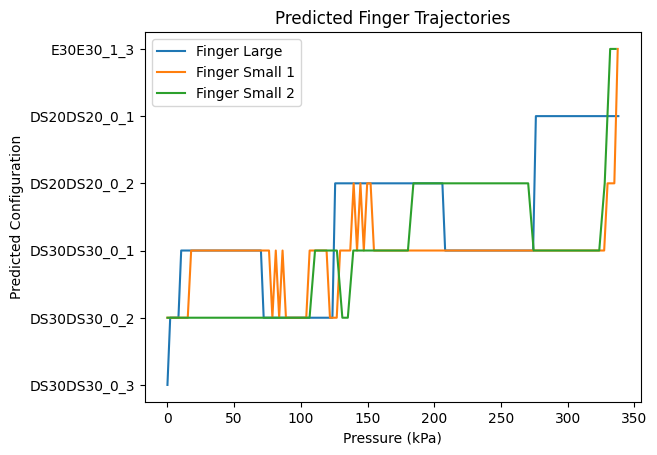

In [167]:
import matplotlib.pyplot as plt


# Plot the predicted finger trajectories
plt.plot(decoded_pred_finger_large_rearranged[:, 0], decoded_pred_finger_large_rearranged[:, 1], label='Finger Large')
plt.plot(decoded_pred_finger_small_1_rearranged[:, 0], decoded_pred_finger_small_1_rearranged[:, 1], label='Finger Small 1')
plt.plot(decoded_pred_finger_small_2_rearranged[:, 0], decoded_pred_finger_small_2_rearranged[:, 1], label='Finger Small 2')

# Set the axis labels and title
plt.xlabel('Pressure (kPa)')
plt.ylabel('Predicted Configuration')
plt.title('Predicted Finger Trajectories')

# Add legend and show the plot
plt.legend()
plt.show()
